<a href="https://colab.research.google.com/github/TetaliVarshitha/WiseML/blob/main/Diabetes(KNN_LogisticRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data['Outcome'].unique() ## Multiclass

array([1, 0])

<Figure size 1440x1440 with 0 Axes>

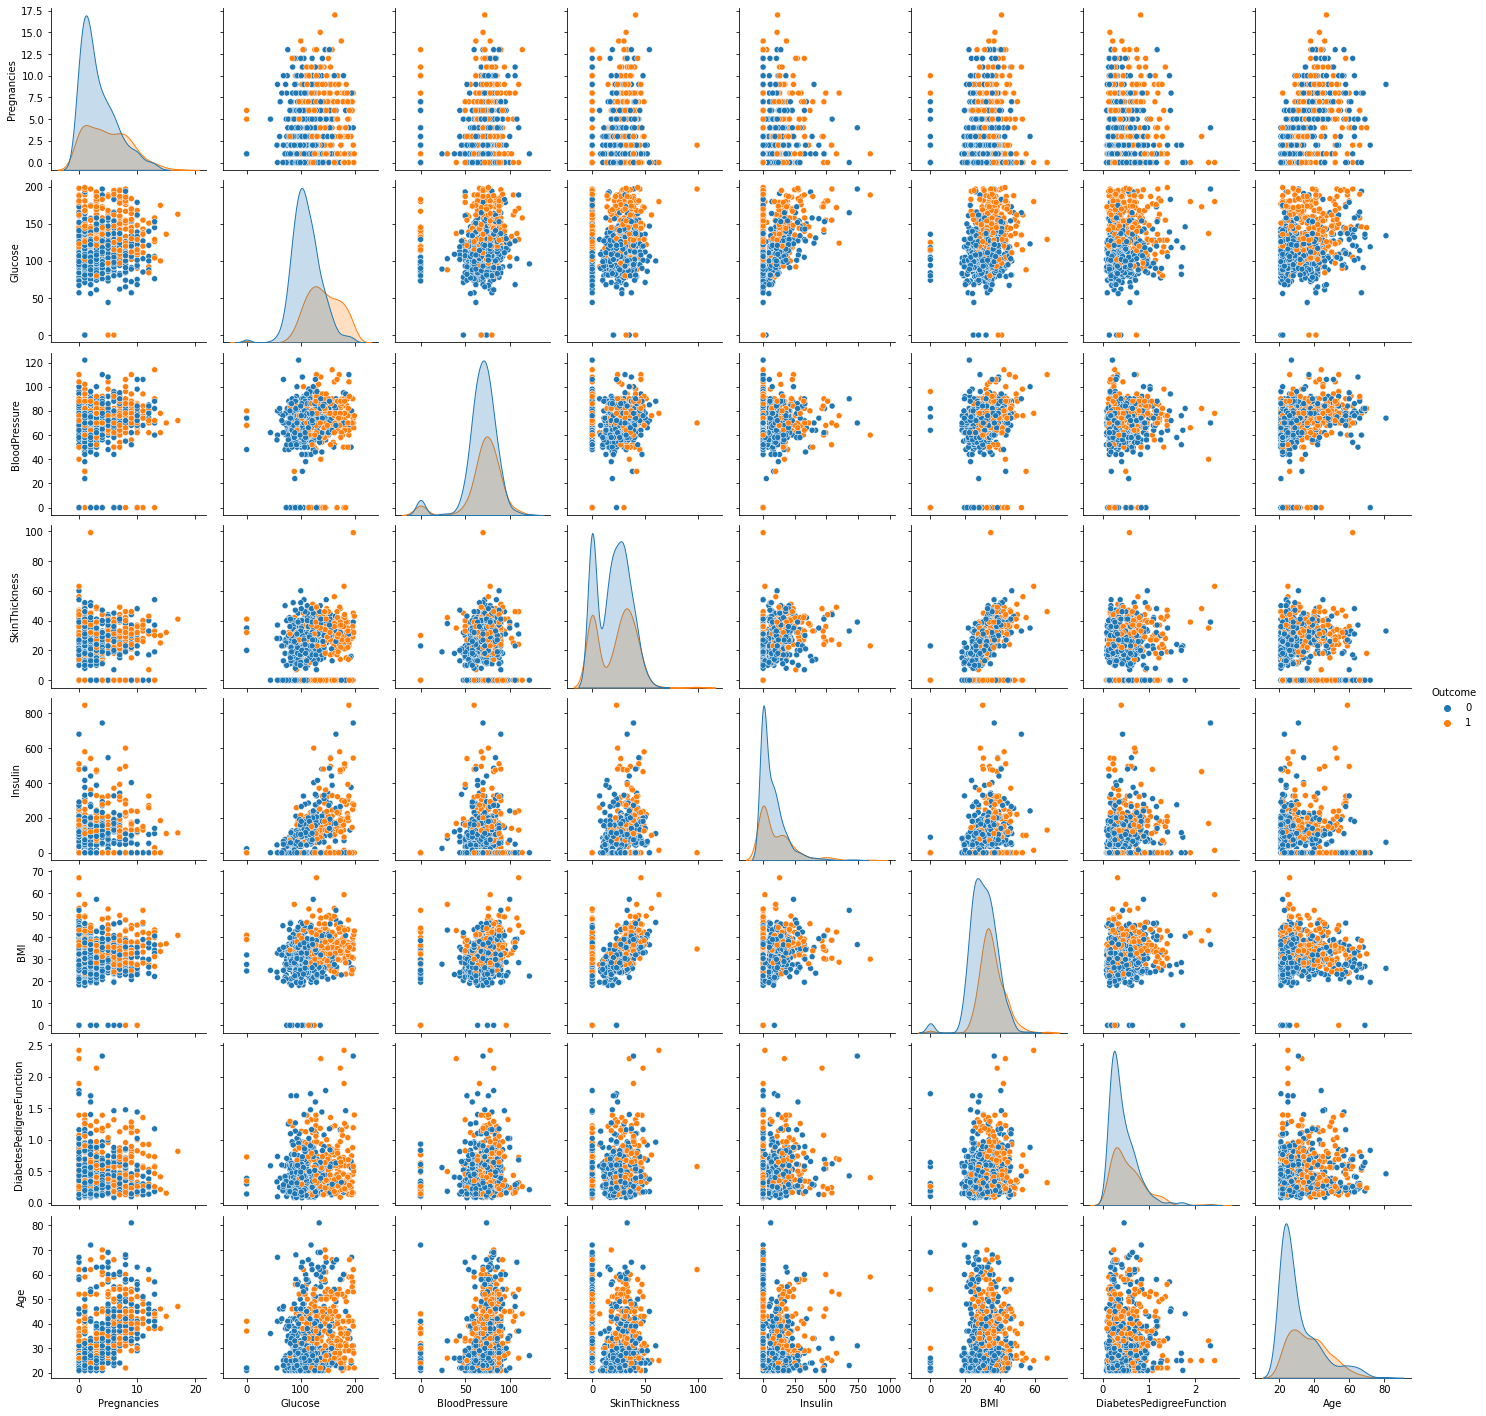

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, hue='Outcome')
plt.show()
plt.close()

In [ ]:
features = data.drop(['Outcome'], axis=1)
target = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

**Logistic Regression:**

In [ ]:
logreg_model = LogisticRegression(max_iter=150, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 78.156%
Testing Accuracy: 73.978%


**K-Nearest Neighbours:**

In [ ]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

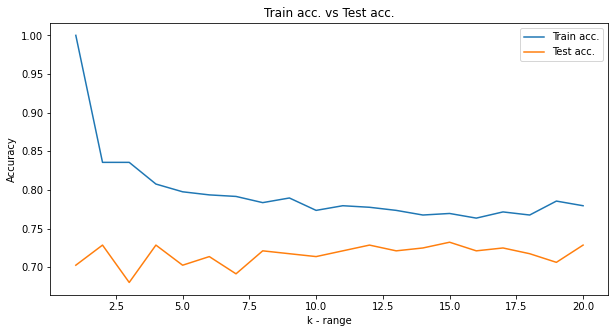

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 78.958%
Testing Accuracy: 71.747%


**DECISION TREES:**

**CART DT**

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 97.996%
Testing Accuracy: 71.004%


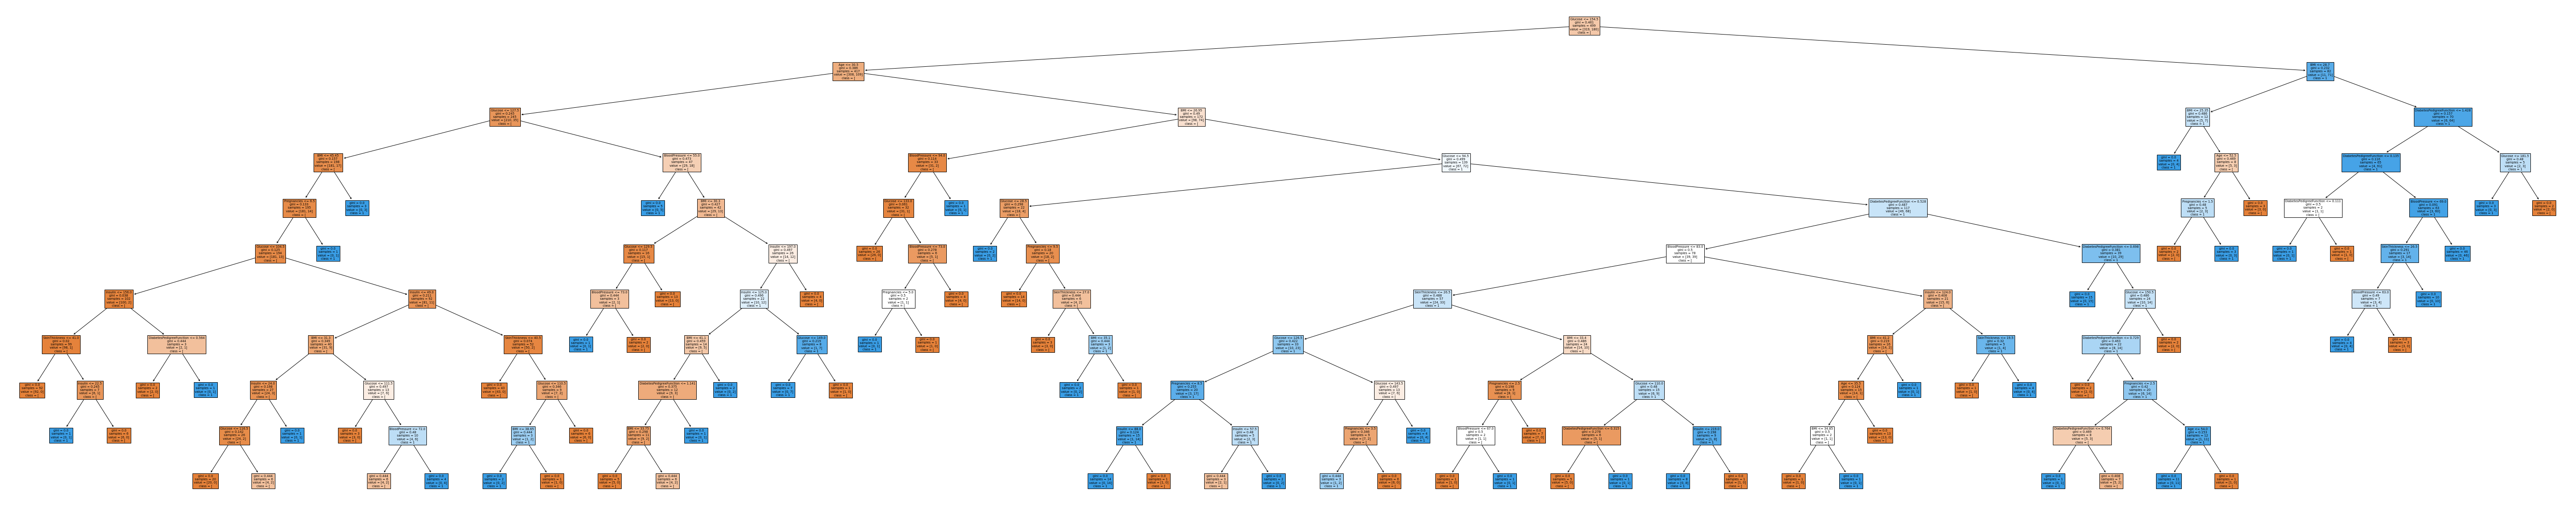

In [ ]:
fig = plt.figure(figsize=(100, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=str(data['Outcome'].unique()))
plt.show()

**ID3 DT**

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 97.395%
Testing Accuracy: 75.093%


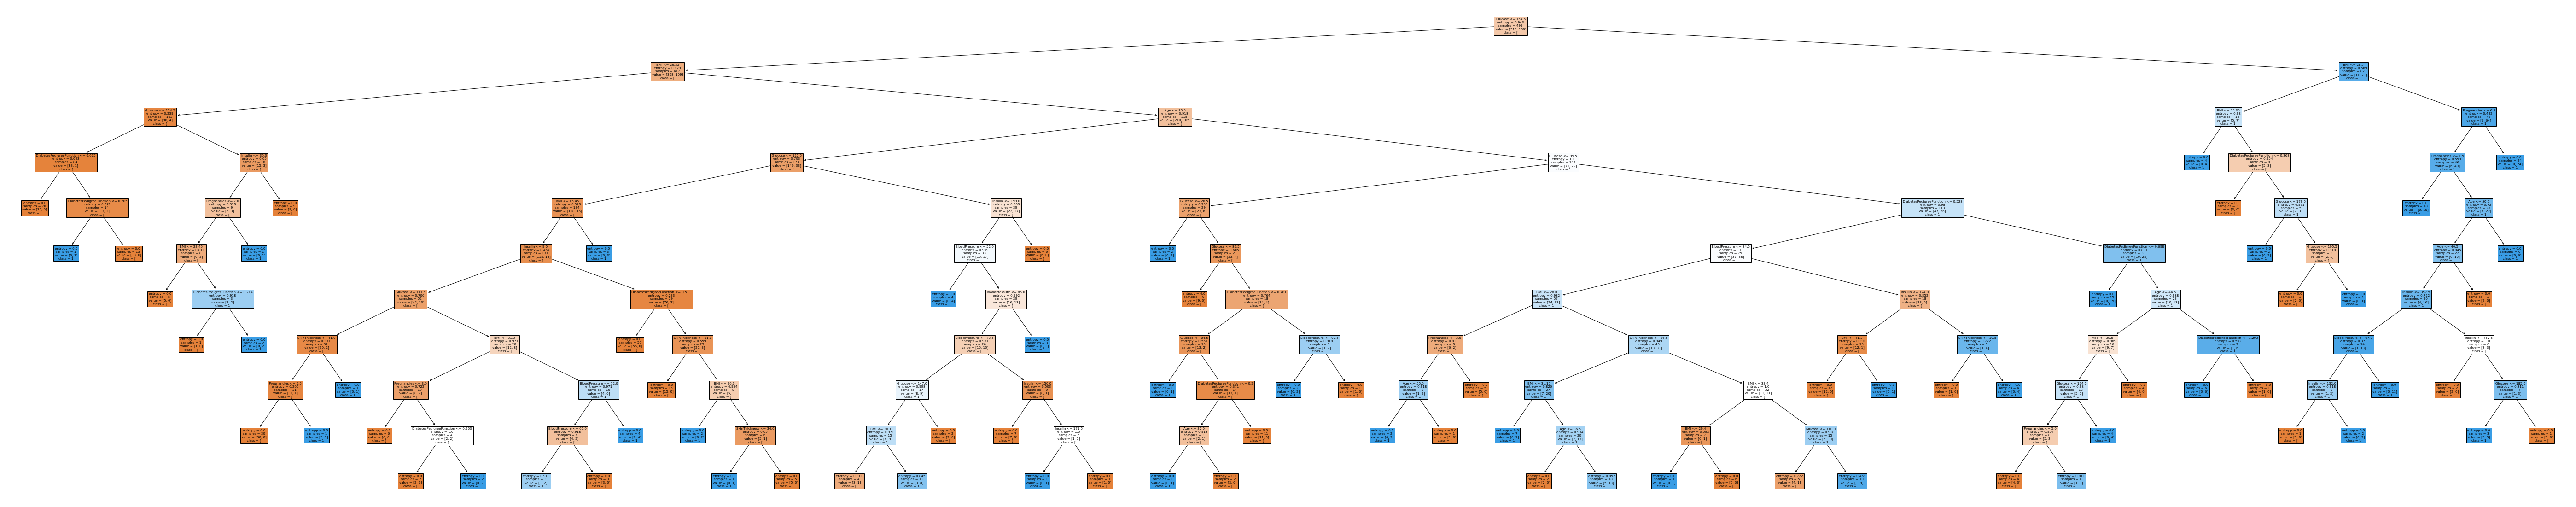

In [ ]:
fig = plt.figure(figsize=(100, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=str(data['Outcome'].unique()))
plt.show()